In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('./Social_Network_Ads.csv')
data.info(), data.describe(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


(None,
             User ID         Age  EstimatedSalary   Purchased
 count  4.000000e+02  400.000000       400.000000  400.000000
 mean   1.569154e+07   37.655000     69742.500000    0.357500
 std    7.165832e+04   10.482877     34096.960282    0.479864
 min    1.556669e+07   18.000000     15000.000000    0.000000
 25%    1.562676e+07   29.750000     43000.000000    0.000000
 50%    1.569434e+07   37.000000     70000.000000    0.000000
 75%    1.575036e+07   46.000000     88000.000000    1.000000
 max    1.581524e+07   60.000000    150000.000000    1.000000,
     User ID  Gender   Age  EstimatedSalary  Purchased
 0  15624510    Male  19.0          19000.0          0
 1  15810944    Male  35.0          20000.0          0
 2  15668575  Female  26.0          43000.0          0
 3  15603246  Female  27.0          57000.0          0
 4  15804002    Male  19.0          76000.0          0)

In [22]:
def get_age_name (series):
    if series['Age'] > 10 and series['Age'] < 30:
        return 'young'
    elif series['Age'] < 40:
        return 'middle'
    else:
        return 'old'
data['age_level'] = data.apply(get_age_name, axis=1)
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,age_level
0,15624510,Male,19.0,19000.0,0,young
1,15810944,Male,35.0,20000.0,0,middle
2,15668575,Female,26.0,43000.0,0,young
3,15603246,Female,27.0,57000.0,0,young
4,15804002,Male,19.0,76000.0,0,young


In [24]:
data.pivot_table(index = ['Gender'], columns = ['age_level'], values='Purchased')

age_level,middle,old,young
Gender,,,
Female,0.227273,0.681818,0.04
Male,0.236111,0.635135,0.04


In [3]:
from sklearn.model_selection import train_test_split

x = data.iloc[:, [2, 3]].values
y = data.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [4]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)
x_train[:5]

array([[ 1.92295008,  2.14601566],
       [ 2.02016082,  0.3787193 ],
       [-1.3822153 , -0.4324987 ],
       [-1.18779381, -1.01194013],
       [ 1.92295008, -0.92502392]])

In [6]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)
classifier.score(x_train, y_train)

0.821875

In [8]:
y_pred = classifier.predict(x_test)
classifier.score(x_test, y_test)

0.8875

In [27]:
# confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
cm

array([[52,  6],
       [ 3, 19]], dtype=int64)

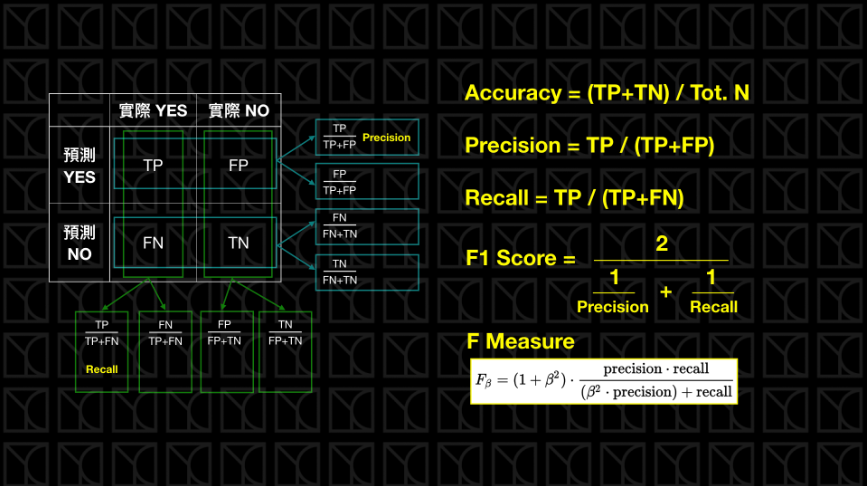

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        58
           1       0.76      0.86      0.81        22

    accuracy                           0.89        80
   macro avg       0.85      0.88      0.86        80
weighted avg       0.89      0.89      0.89        80



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


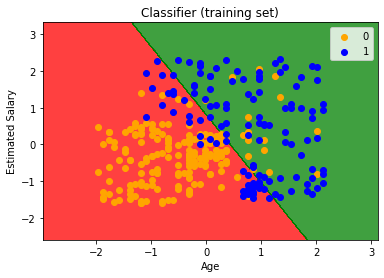

In [15]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train
# 產生 x y 網格座標
x1, x2 = np.meshgrid(
                      np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                      np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01),
                    )
# ravel 變成一維
# ravel not copy, flatten copy, squeeze 只對axis=1降維, reshape(-1)
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('orange', 'blue'))(i), label = j)

plt.title('Classifier (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


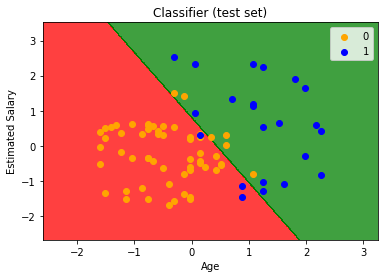

In [16]:
x_test_set, y_test_set = x_test, y_test
x1, x2 = np.meshgrid(
                      np.arange(start=x_test_set[:, 0].min() - 1, stop=x_test_set[:, 0].max() + 1, step=0.01),
                      np.arange(start=x_test_set[:, 1].min() - 1, stop=x_test_set[:, 1].max() + 1, step=0.01),
                    )
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_test_set)):
    plt.scatter(x_test_set[y_test_set == j, 0], x_test_set[y_test_set == j, 1], c = ListedColormap(('orange', 'blue'))(i), label = j)

plt.title('Classifier (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()